## Homework 1 - Time Series Analysis 

### EDS 296 

Jordan Sibley 

April 21, 2025 

In [1]:
# Import libraries 
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import intake
import s3fs

## Data Catalog  

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

## Query the Database

CMIP6 Models:
- IPSL-CM6A-LR 
- MPI-ESM1-2-HR 

I selected these models because they will helpful in examining precipitation data in my area of interest (Guatemala + El Salvador). They both have decent spatial resolution and have data available for both historical and projected times. 

In [3]:
# Query catalog for my two models 
# activity_id: CMIP = historical data, ScenarioMIP = future projections
activity_ids = ['ScenarioMIP', 'CMIP']

# source_id: which model do you want? 
source_id = ['IPSL-CM6A-LR', 'MPI-ESM1-2-HR']

# experiment_id: what experimental configuration do you want? 
experiment_ids = ['historical', 'ssp126', 'ssp245', 'ssp370', 'ssp585']

# member_id: which ensemble member do you want? 
member_id = 'r1i1p1f1'

# table_id: which part of the Earth system and time resolution do you want? 
table_id = 'Amon'

# variable_id: which climate variable do you want? 
variable_id = 'pr'

In [4]:
# Search through catalog, store results in "res" variable
res = catalog.search(activity_id=activity_ids, source_id=source_id, experiment_id=experiment_ids, 
                     member_id=member_id, table_id=table_id, variable_id=variable_id)

# Display data frame associated with results
display(res.df)

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,IPSL,IPSL-CM6A-LR,historical,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/hi...,NaN,20180803
1,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp245,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6...,NaN,20190119
2,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp370,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6...,NaN,20190119
3,CMIP,MPI-M,MPI-ESM1-2-HR,historical,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/CMIP/MPI-M/MPI-ESM1-2-HR/...,NaN,20190710
4,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp370,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1...,NaN,20190710
5,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp585,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1...,NaN,20190710
6,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp245,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1...,NaN,20190710
7,ScenarioMIP,DKRZ,MPI-ESM1-2-HR,ssp126,r1i1p1f1,Amon,pr,gn,s3://cmip6-pds/CMIP6/ScenarioMIP/DKRZ/MPI-ESM1...,NaN,20190710
8,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp126,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6...,NaN,20190903
9,ScenarioMIP,IPSL,IPSL-CM6A-LR,ssp585,r1i1p1f1,Amon,pr,gr,s3://cmip6-pds/CMIP6/ScenarioMIP/IPSL/IPSL-CM6...,NaN,20190903


## Read in historical and projected data 

In [5]:
# Historical data for both model types 
hist_ipsl = xr.open_zarr(res.df['zstore'][0], storage_options={'anon': True})
hist_mpi = xr.open_zarr(res.df['zstore'][3], storage_options={'anon': True})

# Projected data for IPSL model 
ssp245_ipsl = xr.open_zarr(res.df['zstore'][1], storage_options={'anon': True})
ssp585_ipsl = xr.open_zarr(res.df['zstore'][9], storage_options={'anon': True})

# Projected data for MPI model 
ssp245_mpi = xr.open_zarr(res.df['zstore'][6], storage_options={'anon': True})
ssp585_mpi = xr.open_zarr(res.df['zstore'][5], storage_options={'anon': True})

/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/coding/times.py:699: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


In [6]:
# Confirm data is in datetime64 format

# IPSL
hist_ipsl['time'] = xr.decode_cf(hist_ipsl).time
ssp245_ipsl['time'] = xr.decode_cf(ssp245_ipsl).time
ssp585_ipsl['time'] = xr.decode_cf(ssp585_ipsl).time

# MPI
hist_mpi['time'] = xr.decode_cf(hist_mpi).time
ssp245_mpi['time'] = xr.decode_cf(ssp245_mpi).time
ssp585_mpi['time'] = xr.decode_cf(ssp585_mpi).time


# Concatenate historical and future projection data
# IPSL 
ipsl_245 = xr.concat([hist_ipsl, ssp245_ipsl], dim="time")
ipsl_585 = xr.concat([hist_ipsl, ssp585_ipsl], dim="time")

# MPI
mpi_245 = xr.concat([hist_mpi, ssp245_mpi], dim="time")
mpi_585 = xr.concat([hist_mpi, ssp245_mpi], dim="time")

/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


## Defining area and time of interest

In [7]:
# Define bounds for Guatemala region 
lat_min, lat_max = 12.614, 16.337
lon_min, lon_max = 267.6, 273.0 

# Mask IPSL 245 data to bounding box 
pr_ipsl245_lat = (ipsl_245.lat >= lat_min) & (ipsl_245.lat <= lat_max)
pr_ipsl245_lon = (ipsl_245.lon >= lon_min) & (ipsl_245.lon <= lon_max)

pr_ipsl245 = ipsl_245.where(pr_ipsl245_lat & pr_ipsl245_lon, drop=True) 

# Do a spatial average over the region by averaging over lat, lon dimensions
pr_ipsl245 = pr_ipsl245.mean(dim=['lat', 'lon'])

# Select period of interests 
pr_ipsl245 = pr_ipsl245.convert_calendar('standard', use_cftime=False)
pr_ipsl245_hist = pr_ipsl245.sel(time=slice('1850-01-01','2015-12-31'))
pr_ipsl245_proj = pr_ipsl245.sel(time=slice('1850-01-01','2100-12-31'))

# Calc mean annual precip for both time series 
mean_ipsl245_hist = pr_ipsl245_hist.groupby('time.year').mean()
mean_ipsl245_proj = pr_ipsl245_proj.groupby('time.year').mean()

# Convert from kg/m²/s to mm/year
seconds_per_year = 365 * 24 * 60 * 60  # basic approximation
pr_hist_mm_year = mean_ipsl245_hist * seconds_per_year
pr_proj_mm_year = mean_ipsl245_proj * seconds_per_year

# Extract years and values
years_hist = pr_hist_mm_year.year.values
precip_hist = pr_hist_mm_year['pr'].values

years_proj = pr_proj_mm_year.year.values
precip_proj = pr_proj_mm_year['pr'].values

# Fit linear trend line
x_hist = np.polyfit(years_hist, precip_hist, 1)
x_proj = np.polyfit(years_proj, precip_proj, 1)

# Create polynomial objects for the trend lines
trend_line_hist = np.poly1d(x_hist)
trend_line_proj = np.poly1d(x_proj)

/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)
/opt/anaconda3/envs/eds296-stevenson/lib/python3.8/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


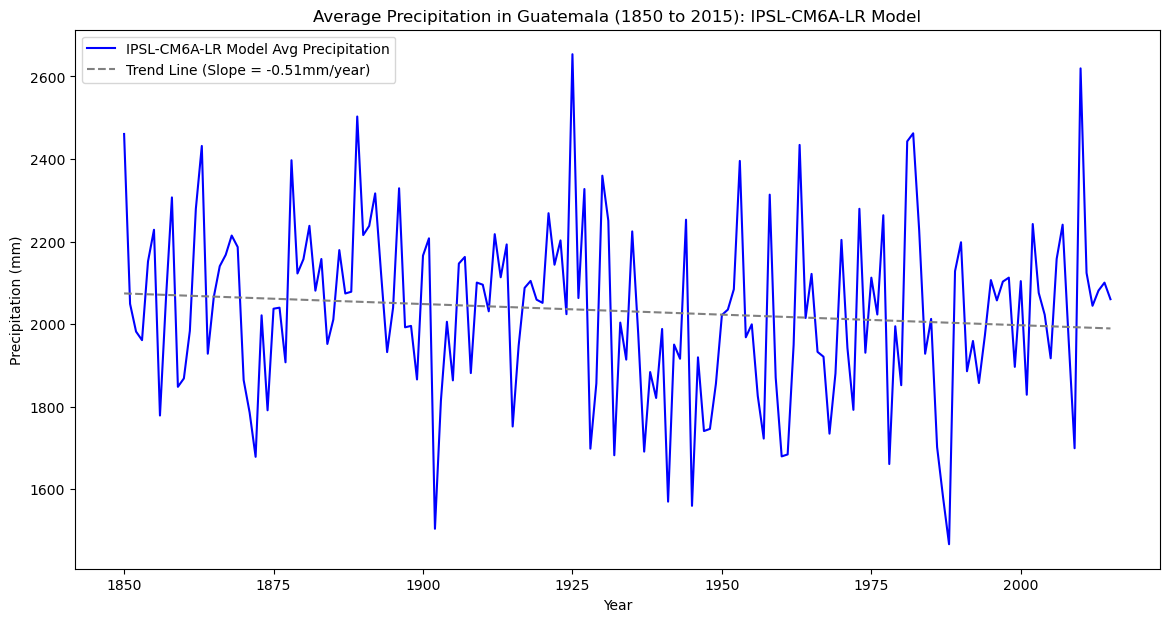

In [8]:
# Generate plot of historic data from IPSL model

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(years_hist, precip_hist, label= 'IPSL-CM6A-LR Model Avg Precipitation', color='blue')
ax.plot(years_hist, trend_line_hist(years_hist), color='grey', linestyle='--', label=f'Trend Line (Slope = {x_hist[0]:.2f}mm/year)')
ax.set_title('Average Precipitation in Guatemala (1850 to 2015): IPSL-CM6A-LR Model')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show()

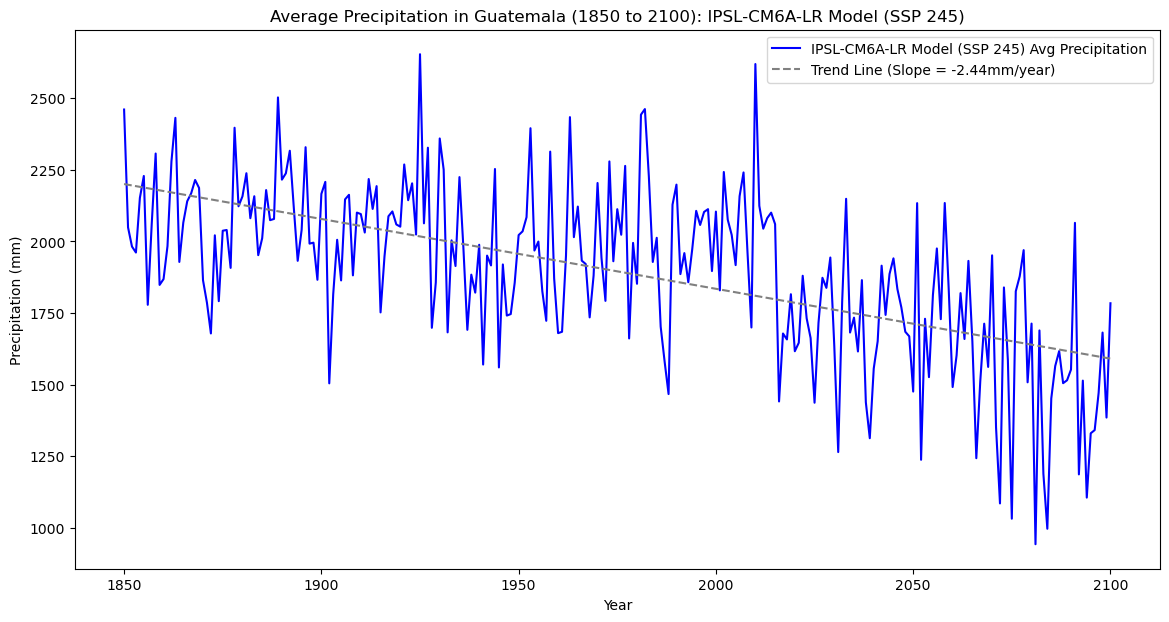

In [9]:
# Generate plot of historical + projected data from IPSL SSP245 model

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(years_proj, precip_proj, label= 'IPSL-CM6A-LR Model (SSP 245) Avg Precipitation', color='blue')
ax.plot(years_proj, trend_line_proj(years_proj), color='grey', linestyle='--', label=f'Trend Line (Slope = {x_proj[0]:.2f}mm/year)')
ax.set_title('Average Precipitation in Guatemala (1850 to 2100): IPSL-CM6A-LR Model (SSP 245)')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show()

Based on the results of these two plots, it seems that average annual precipitation has been steadily decreasing since the 1850s to the present at a rate of -0.51 mm per year, and is projected to continue to decrease at a even faster rate into the future. 

Now, I will recreate the plots under the other model using the other projection 

In [14]:
# Define bounds for Guatemala region 
lat_min, lat_max = 12.614, 16.337
lon_min, lon_max = 267.6, 273.0 

# Mask IPSL 245 data to bounding box 
pr_mpi585_lat = (mpi_585.lat >= lat_min) & (mpi_585.lat <= lat_max)
pr_mpi585_lon = (mpi_585.lon >= lon_min) & (mpi_585.lon <= lon_max)

pr_mpi585 = mpi_585.where(pr_mpi585_lat & pr_mpi585_lon, drop=True) 

# Do a spatial average over the region by averaging over lat, lon dimensions
pr_mpi585 = pr_mpi585.mean(dim=['lat', 'lon'])

# Select period of interests 
pr_mpi585 = pr_mpi585.convert_calendar('standard', use_cftime=False)
pr_mpi585_hist = pr_ipsl245.sel(time=slice('1850-01-01','2015-12-31'))
pr_mpi585_proj = pr_ipsl245.sel(time=slice('1850-01-01','2100-12-31'))

# Calc mean annual precip for both time series 
mean_mpi585_hist = pr_mpi585_hist.groupby('time.year').mean()
mean_mpi585_proj = pr_mpi585_proj.groupby('time.year').mean()

# Convert from kg/m²/s to mm/year
seconds_per_year = 365 * 24 * 60 * 60  # basic approximation
pr_hist_mm_year = mean_mpi585_hist * seconds_per_year
pr_proj_mm_year = mean_mpi585_proj * seconds_per_year

# Extract years and values
years_hist = pr_hist_mm_year.year.values
precip_hist = pr_hist_mm_year['pr'].values

years_proj = pr_proj_mm_year.year.values
precip_proj = pr_proj_mm_year['pr'].values

# Fit linear trend line
x_hist = np.polyfit(years_hist, precip_hist, 1)
x_proj = np.polyfit(years_proj, precip_proj, 1)

# Create polynomial objects for the trend lines
trend_line_hist = np.poly1d(x_hist)
trend_line_proj = np.poly1d(x_proj)

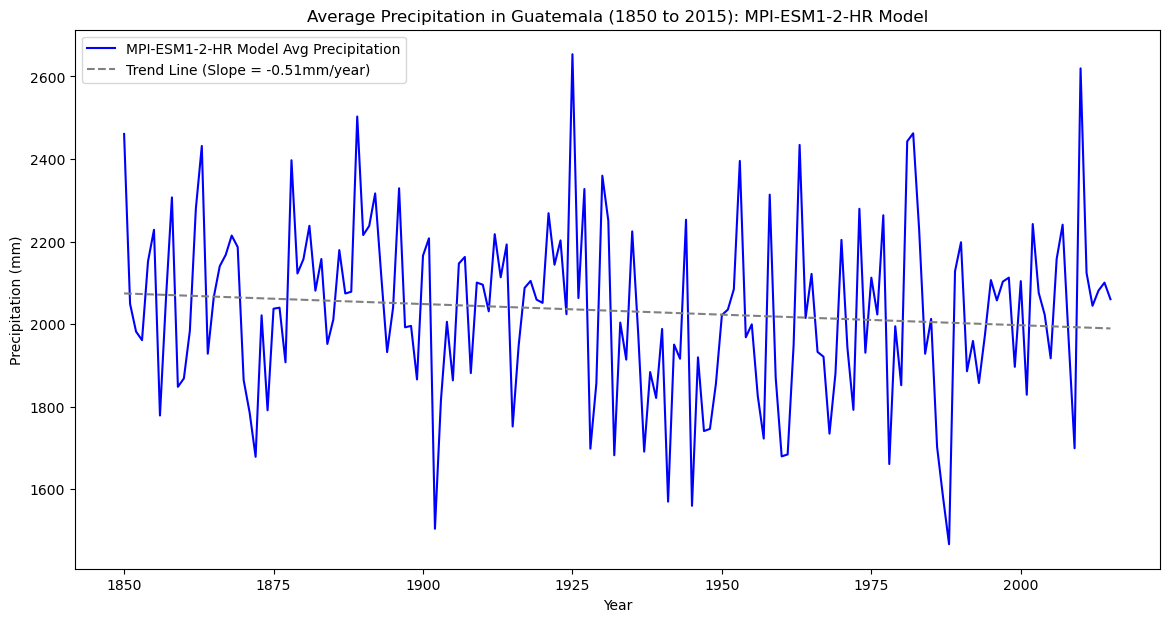

In [16]:
# Generate plot of historic data from MPI model

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(years_hist, precip_hist, label= 'MPI-ESM1-2-HR Model Avg Precipitation', color='blue')
ax.plot(years_hist, trend_line_hist(years_hist), color='grey', linestyle='--', label=f'Trend Line (Slope = {x_hist[0]:.2f}mm/year)')
ax.set_title('Average Precipitation in Guatemala (1850 to 2015): MPI-ESM1-2-HR Model')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show()

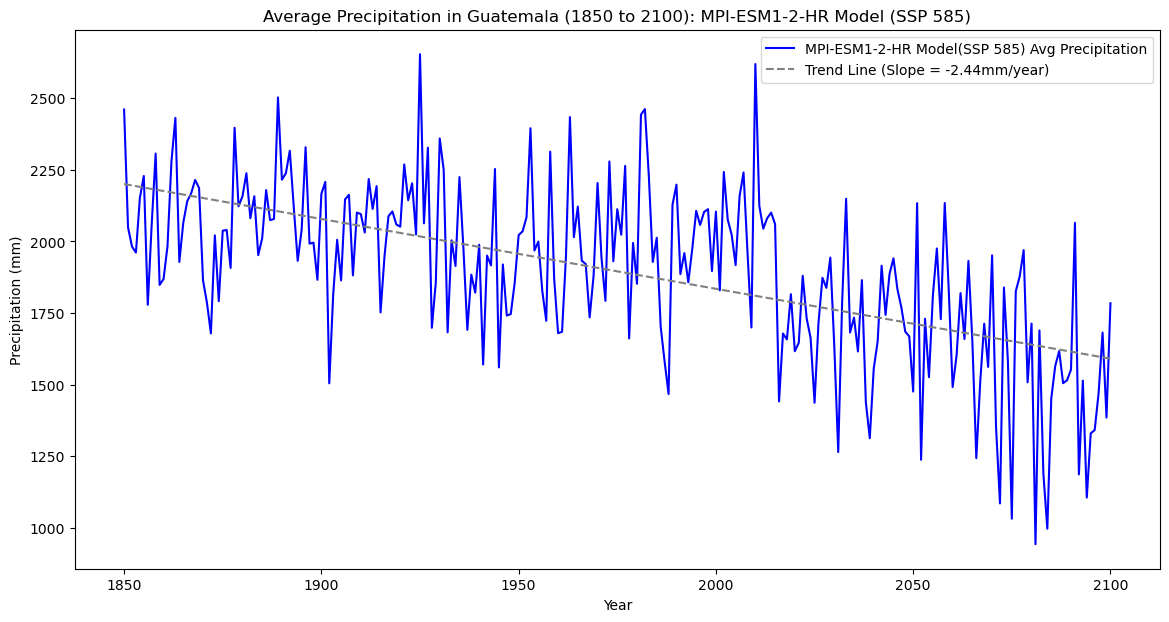

In [15]:
# Generate plot of historical + projected data from MPI SSP585 model

fig, ax = plt.subplots(figsize=(14,7))
ax.plot(years_proj, precip_proj, label= 'MPI-ESM1-2-HR Model(SSP 585) Avg Precipitation', color='blue')
ax.plot(years_proj, trend_line_proj(years_proj), color='grey', linestyle='--', label=f'Trend Line (Slope = {x_proj[0]:.2f}mm/year)')
ax.set_title('Average Precipitation in Guatemala (1850 to 2100): MPI-ESM1-2-HR Model (SSP 585)')
ax.set_xlabel('Year')
ax.set_ylabel('Precipitation (mm)')
ax.legend()
plt.show()

It looks like this model predicts a very similar outcome. This downward trend could have significant implications for both humans and the greater ecosystems in the Guatemala/El Salvador. This could increase water scarcity, particularly for agriculture and urban water supply. Diminished rainfall could lead to lower crop yields, increased irrigation demands, and heightened competition for water resources. Species that depend on consistent rainfall, particularly those in sensitive habitats like wetlands or forests, may face increased stress or even displacement. This trend suggests the need for adaptive management strategies to mitigate the potential impacts of reduced rainfall in the region.